# get packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
%matplotlib ipympl



from setup_data import setup_as_data, setup_an_data
from utils import time_period, plot_dfs

# get data

In [2]:
Austevoll_Sor_file_path = "row_data\\Austevoll_Sor\\Austevoll_data_instrument.feather"
print(Austevoll_Sor_file_path)
Austevoll_Sor_df = pd.read_feather(Austevoll_Sor_file_path)
Austevoll_Sor_df.set_index('Time', inplace=True)
len(Austevoll_Sor_df)

row_data\Austevoll_Sor\Austevoll_data_instrument.feather


22393

In [3]:
r_h=1
as_list_segments = [3, 4, 5, 6, 7, 8, 9]
Austevoll_Sor_df_segments = setup_as_data(Austevoll_Sor_df, smooth_sigma=18, list_segments=as_list_segments, r_h=r_h)

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the 

✅ Fitted params: a=12.0014, b=33.4993, d=1504.20, s=0.000419
✅ Fitted params: a=11.9337, b=100.0000, d=1276.91, s=0.000454


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=11.7349, b=31.0688, d=1794.10, s=0.000294


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=11.8411, b=54.1138, d=1282.37, s=0.000331
✅ Fitted params: a=11.9139, b=100.0000, d=1759.97, s=0.000440


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=12.1056, b=45.0836, d=1593.32, s=0.000729
✅ Fitted params: a=12.7512, b=100.0000, d=1840.77, s=0.000400


In [4]:
Austevoll_Sor_df_segments[3].columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0',
       'Time_Since_t0_n', 'Hours_Since_t0', 'Days_Since_t0', 'Weeks_Since_t0',
       'Months_Since_t0', 'year', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'Temperature',
       'Temperature_sum', 'sin_month', 'cos_month', 'sin_week', 'cos_week',
       'sin_day', 'cos_day', 'sin_hour', 'cos_hour',
       'System_Parameters.Input_Voltage', 'Battery_Level_Fitted',
       'Battery_Level_Derivative', 'Voltage_Lag1', 'Voltage_Lead1',
       'Voltage_Diff', 'Voltage_Change_Rate', 'Rolling_Mean_Voltage',
       'Rolling_Max_Voltage', 'Rolling_Std_Voltage'],
      dtype='object')

In [5]:
from utils import time_period

#6,4,3,8 
# period for all segments
for i in range(len(as_list_segments)):
    print(f"segment {as_list_segments[i]}: {time_period(Austevoll_Sor_df_segments[as_list_segments[i]])}")

segment 3: (1, 28, 17, 0, 0)
segment 4: (1, 22, 8, 0, 0)
segment 5: (2, 9, 23, 0, 0)
segment 6: (1, 21, 20, 0, 0)
segment 7: (2, 12, 4, 0, 0)
segment 8: (2, 3, 0, 0, 0)
segment 9: (2, 14, 13, 0, 0)


## adding more features

In [6]:
def process_segment(df):
    """
    Process a single segment DataFrame.
    No resetting index — use index as datetime.
    Adds voltage over time and ht feature too.
    """
    df = df.copy()
    
    # Compute time elapsed in seconds from start (use index)
    df['time_seconds'] = (df.index - df.index[0]).total_seconds()
    
    # Derivative of voltage (how fast voltage is dropping/rising)
    df['dV_dt'] = df['Battery_Level_Fitted'].diff() / df['time_seconds'].diff()
    df['dV_dt'].fillna(0, inplace=True)
    
    
    # Rolling mean of voltage (to smooth out noise)
    df['voltage_roll5'] = df['Battery_Level_Fitted'].rolling(window=10, min_periods=1).mean()
    
    # Voltage over time: normalized voltage decay
    initial_voltage = df['Battery_Level_Fitted'].iloc[0]
    df['voltage_over_time'] = df['Battery_Level_Fitted'] / initial_voltage


    
    # Health ht feature: 1 if voltage > 11.65, else 0
    df['ht'] = (df['Battery_Level_Fitted'] > 11.5).astype(float)
    
    
    df['temp_cos'] = np.cos(df.index.dayofyear * (2 * np.pi / 365))
    df['temp_sin'] = np.sin(df.index.dayofyear * (2 * np.pi / 365))

    return df




for i, df in Austevoll_Sor_df_segments.items():
    processed_df = process_segment(df)
    Austevoll_Sor_df_segments[i] = processed_df



C:\Users\yfess\AppData\Local\Temp\ipykernel_16476\4221271881.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dV_dt'].fillna(0, inplace=True)
C:\Users\yfess\AppData\Local\Temp\ipykernel_16476\4221271881.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [7]:
as_df = pd.concat([
    #Austevoll_Sor_df_segments[1].copy(),
    #Austevoll_Sor_df_segments[2].copy() 
    Austevoll_Sor_df_segments[3].copy(),
    Austevoll_Sor_df_segments[4].copy(),
    Austevoll_Sor_df_segments[5].copy(),
    Austevoll_Sor_df_segments[6].copy(),
    Austevoll_Sor_df_segments[7].copy(),
    Austevoll_Sor_df_segments[8].copy(),
    Austevoll_Sor_df_segments[9].copy()
    #Austevoll_Sor_df_segments[10].copy()
])

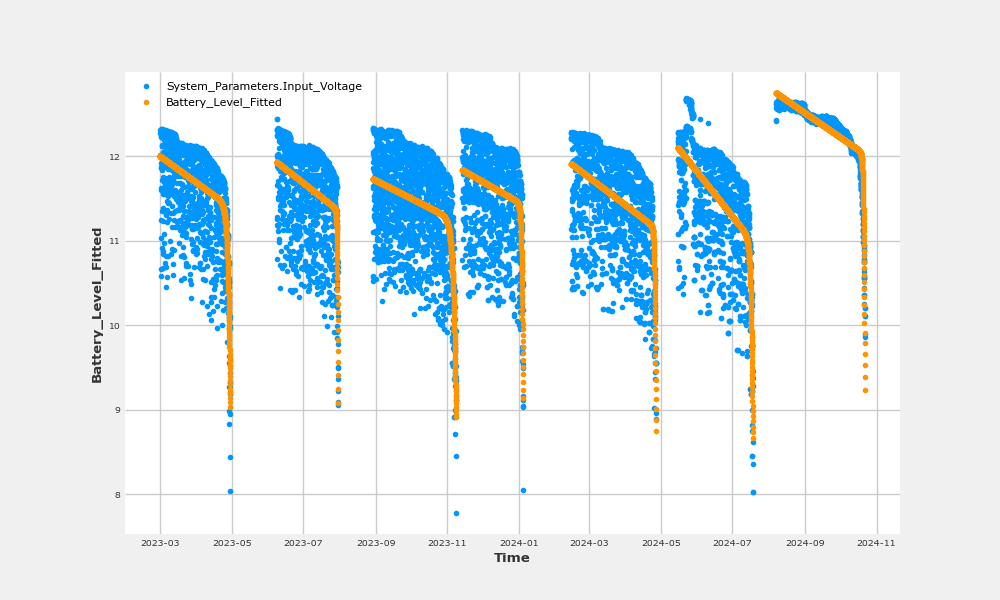

In [8]:
plot_dfs([as_df[['System_Parameters.Input_Voltage', 'Battery_Level_Fitted',]]])

In [9]:
as_df.reset_index(inplace=True)
as_df.head(1)

,Time,Num_Not_Nan,Num_Nan,Num_Bytes,Time_Since_t0,Time_Since_t0_n,Hours_Since_t0,Days_Since_t0,Weeks_Since_t0,Months_Since_t0,...,Rolling_Mean_Voltage,Rolling_Max_Voltage,Rolling_Std_Voltage,time_seconds,dV_dt,voltage_roll5,voltage_over_time,ht,temp_cos,temp_sin
0,2023-03-01,20.0,29.0,207.0,0.0,0.0,0.0,0,0,0,...,12.001394,12.001394,NaN,0.0,0.0,12.001394,1.0,1.0,0.512371,0.858764


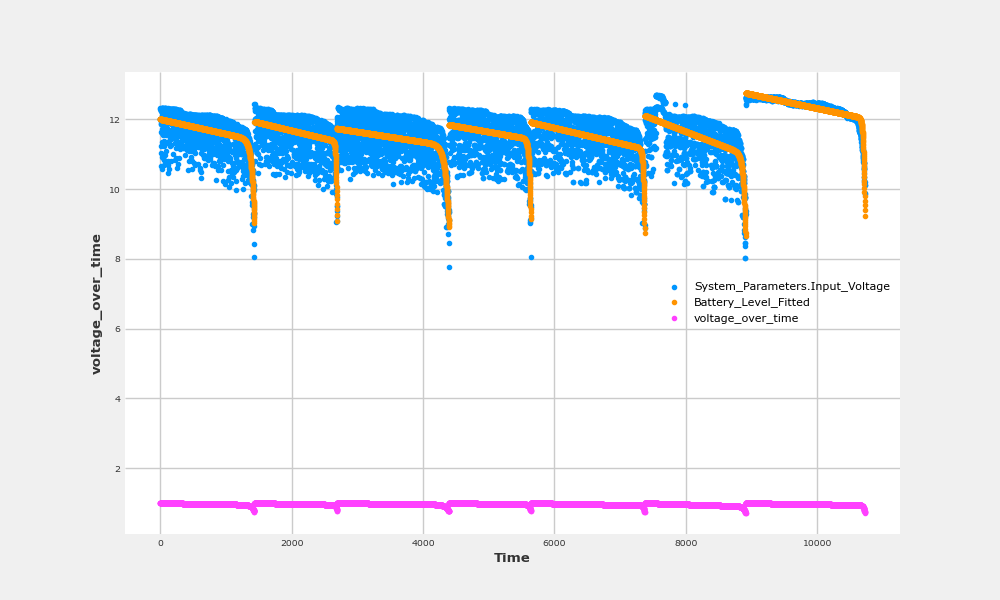

In [10]:
plot_dfs([as_df[['System_Parameters.Input_Voltage', 'Battery_Level_Fitted','voltage_over_time']]])

In [11]:
as_df.columns

Index(['Time', 'Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0',
       'Time_Since_t0_n', 'Hours_Since_t0', 'Days_Since_t0', 'Weeks_Since_t0',
       'Months_Since_t0', 'year', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'Temperature',
       'Temperature_sum', 'sin_month', 'cos_month', 'sin_week', 'cos_week',
       'sin_day', 'cos_day', 'sin_hour', 'cos_hour',
       'System_Parameters.Input_Voltage', 'Battery_Level_Fitted',
       'Battery_Level_Derivative', 'Voltage_Lag1', 'Voltage_Lead1',
       'Voltage_Diff', 'Voltage_Change_Rate', 'Rolling_Mean_Voltage',
       'Rolling_Max_Voltage', 'Rolling_Std_Voltage', 'time_seconds', 'dV_dt',
       'voltage_roll5', 'voltage_over_time', 'ht', 'temp_cos', 'temp_sin'],
      dtype='object')

# model training

In [12]:
list_features = ['Time', 'Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 
                 
                 'Time_Since_t0',
       'Time_Since_t0_n','Hours_Since_t0', 'Days_Since_t0', 'Weeks_Since_t0',
       'Months_Since_t0', 
       
       'year', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 
       
       'Temperature',
       'Temperature_sum', 'sin_month', 'cos_month', 'sin_week', 'cos_week',
       'sin_day', 'cos_day', 'sin_hour', 'cos_hour',
       
       
       'System_Parameters.Input_Voltage', 
       'Battery_Level_Fitted',        # y
       'Battery_Level_Derivative', 
       
       'Voltage_Lag1', 'Voltage_Lead1',
       'Voltage_Diff', 'Voltage_Change_Rate', 'Rolling_Mean_Voltage',
       'Rolling_Max_Voltage', 'Rolling_Std_Voltage', 
       
       'time_seconds',
       'voltage_roll5', 'voltage_over_time', 'ht', 'temp_cos', 'temp_sin']




features =  [
        #'Hours_Since_t0',
        'Days_Since_t0',
        #'Weeks_Since_t0',
        
        'voltage_roll5',
        
        #'voltage_over_time',
        'ht',
        
        #'temp_cos',
        #'temp_sin',
        
        #'Voltage_Lead1',
        #'Battery_Level_Fitted'
        
        
        'Voltage_Lag1',
       #'Voltage_Diff', 
       #'Voltage_Change_Rate', 
       #'Rolling_Mean_Voltage',
       'Rolling_Max_Voltage', 
       # 'Rolling_Std_Voltage', 
       
       #'Battery_Level_Fitted',
       #'System_Parameters.Input_Voltage', 
        
        ]

target = 'Battery_Level_Fitted'

## model

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
as_df_shuffled = as_df.sample(frac=1, random_state=42).reset_index(drop=True)

X = as_df_shuffled[features].copy()
y = as_df_shuffled[target].copy() 

In [15]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Train model
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42  # <== lock this
)
model.fit(X, y)

X_test =  Austevoll_Sor_df_segments[3][features].copy()
y_test = Austevoll_Sor_df_segments[3][target].copy()

# Predict on the held-out segment
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 MSE: {mse:.4f}")
print(f"📈 R²: {r2:.4f}")


📉 MSE: 0.0002
📈 R²: 0.9989


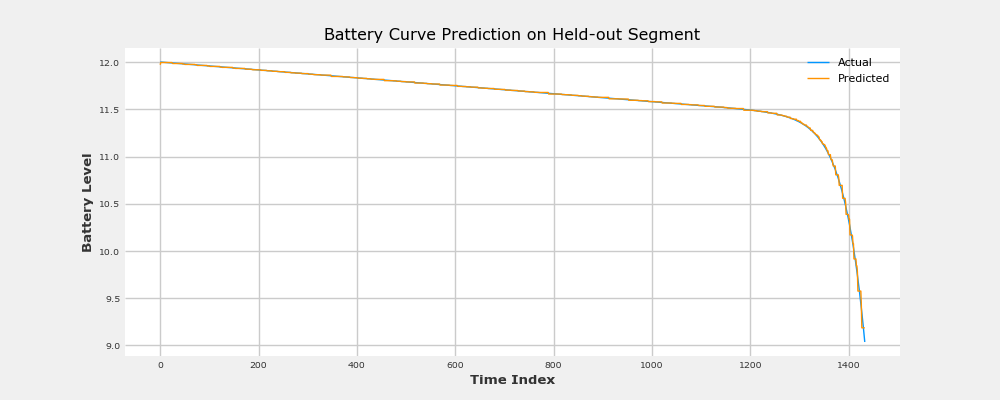

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Battery Curve Prediction on Held-out Segment")
plt.xlabel("Time Index")
plt.ylabel("Battery Level")
plt.legend()
plt.grid()
plt.show()


# Ausevoll Nord

## get data

In [17]:
Austevoll_Nord_file_path =  "row_data\\Austevoll_Nord\\Austevoll_data_instrument.feather"
print(Austevoll_Nord_file_path)
Austevoll_Nord_df = pd.read_feather(Austevoll_Nord_file_path)
Austevoll_Nord_df.set_index('Time', inplace=True)
len(Austevoll_Nord_df)

row_data\Austevoll_Nord\Austevoll_data_instrument.feather


24219

In [18]:
an_list_segments = [1,2,3,4,5,6,7]
Austevoll_Nord_df_segments = setup_an_data(Austevoll_Nord_df, smooth_sigma=18, list_segments=an_list_segments, r_h=r_h)

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=12.3578, b=100.0000, d=2569.03, s=0.000000
✅ Fitted params: a=12.5451, b=100.0000, d=2230.51, s=0.000356


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=12.4984, b=100.0000, d=1580.14, s=0.000242


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=12.5879, b=100.0000, d=1933.20, s=0.000241


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=12.7122, b=100.0000, d=1808.79, s=0.000408


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=12.8092, b=100.0000, d=1752.66, s=0.000200
✅ Fitted params: a=12.4247, b=100.0000, d=989.18, s=0.000871


In [19]:
for i, df in Austevoll_Nord_df_segments.items():
    processed_df = process_segment(df)
    Austevoll_Nord_df_segments[i] = processed_df

C:\Users\yfess\AppData\Local\Temp\ipykernel_16476\4221271881.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dV_dt'].fillna(0, inplace=True)
C:\Users\yfess\AppData\Local\Temp\ipykernel_16476\4221271881.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

📉 Segment 2 - MSE: 0.0033
📈 Segment 2 - R²: 0.9728


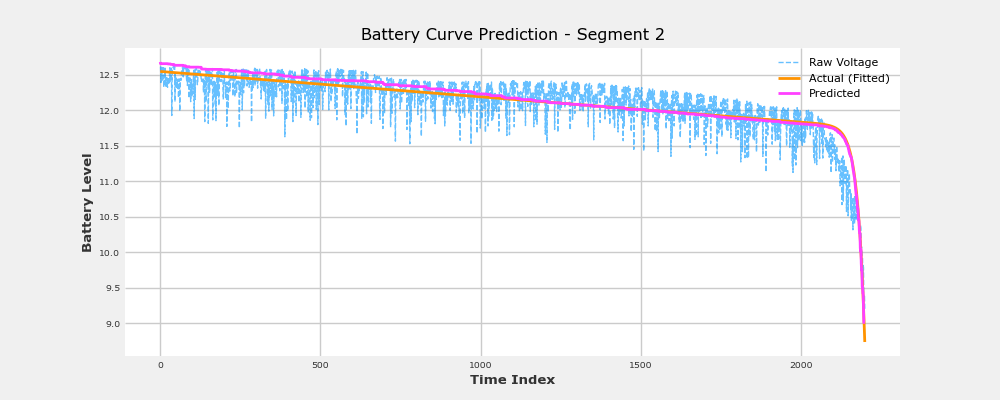

📉 Segment 3 - MSE: 0.0041
📈 Segment 3 - R²: 0.8945


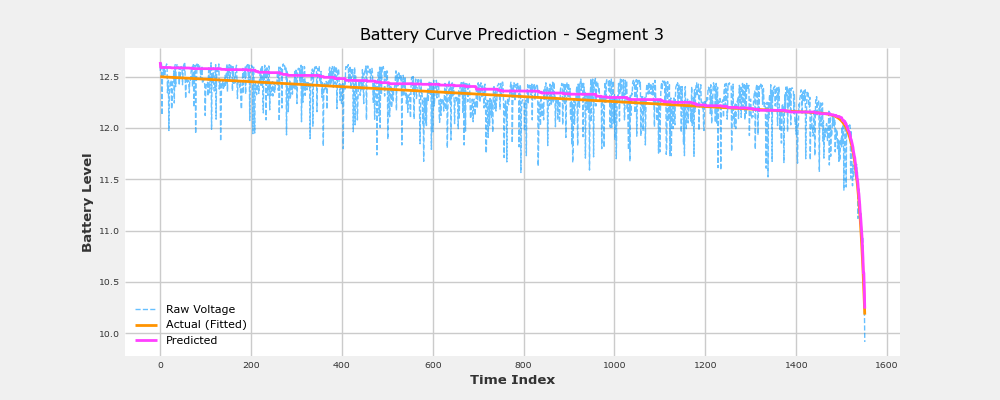

📉 Segment 5 - MSE: 0.0004
📈 Segment 5 - R²: 0.9965


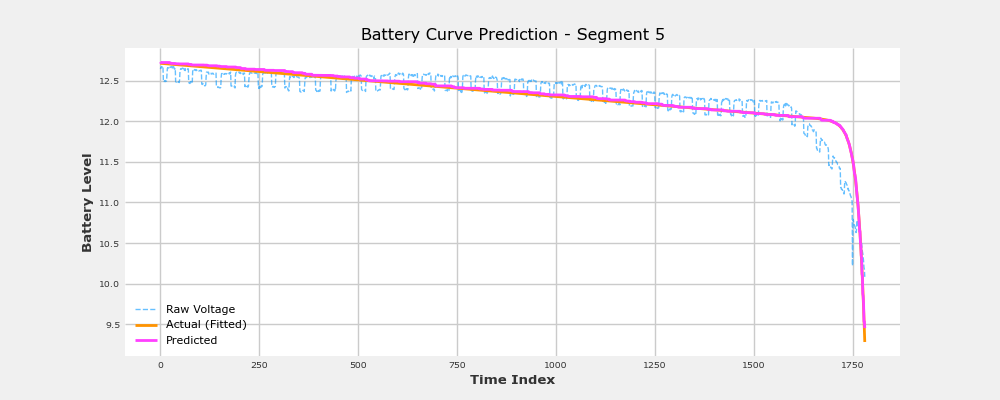

📉 Segment 7 - MSE: 0.0068
📈 Segment 7 - R²: 0.9435


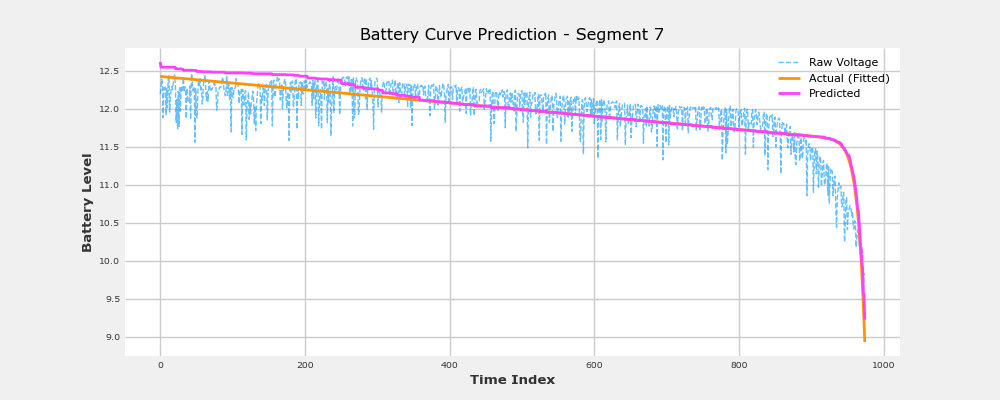

In [27]:
from feature_adder import inverse_transform
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# List of segments to predict
segs_to_predict = [2, 3, 5, 7]

for seg_id in segs_to_predict:
    # Get the actual segment dataframe
    seg_df = Austevoll_Nord_df_segments[seg_id]

    # Get test data
    X_test = seg_df[features].copy()
    y_test = seg_df[target].copy()

    # Predict on the held-out segment
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"📉 Segment {seg_id} - MSE: {mse:.4f}")
    print(f"📈 Segment {seg_id} - R²: {r2:.4f}")
    
    # Raw voltage from the segment
    vo = seg_df['System_Parameters.Input_Voltage'].values

    # Plotting
    plt.figure(figsize=(10, 4))
    plt.plot(vo, label='Raw Voltage', linestyle='--', alpha=0.6)
    plt.plot(y_test.values, label='Actual (Fitted)', linewidth=2)
    plt.plot(y_pred, label='Predicted', linewidth=2)

    plt.title(f"Battery Curve Prediction - Segment {seg_id}")
    plt.xlabel("Time Index")
    plt.ylabel("Battery Level")
    plt.legend()
    plt.grid()
    plt.show()


# fin